In [16]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from skimage import io
from skimage.color import rgb2hsv, rgb2hed
from skimage import data, exposure, img_as_float
from skimage.exposure import rescale_intensity

Prepared folder: 1M02


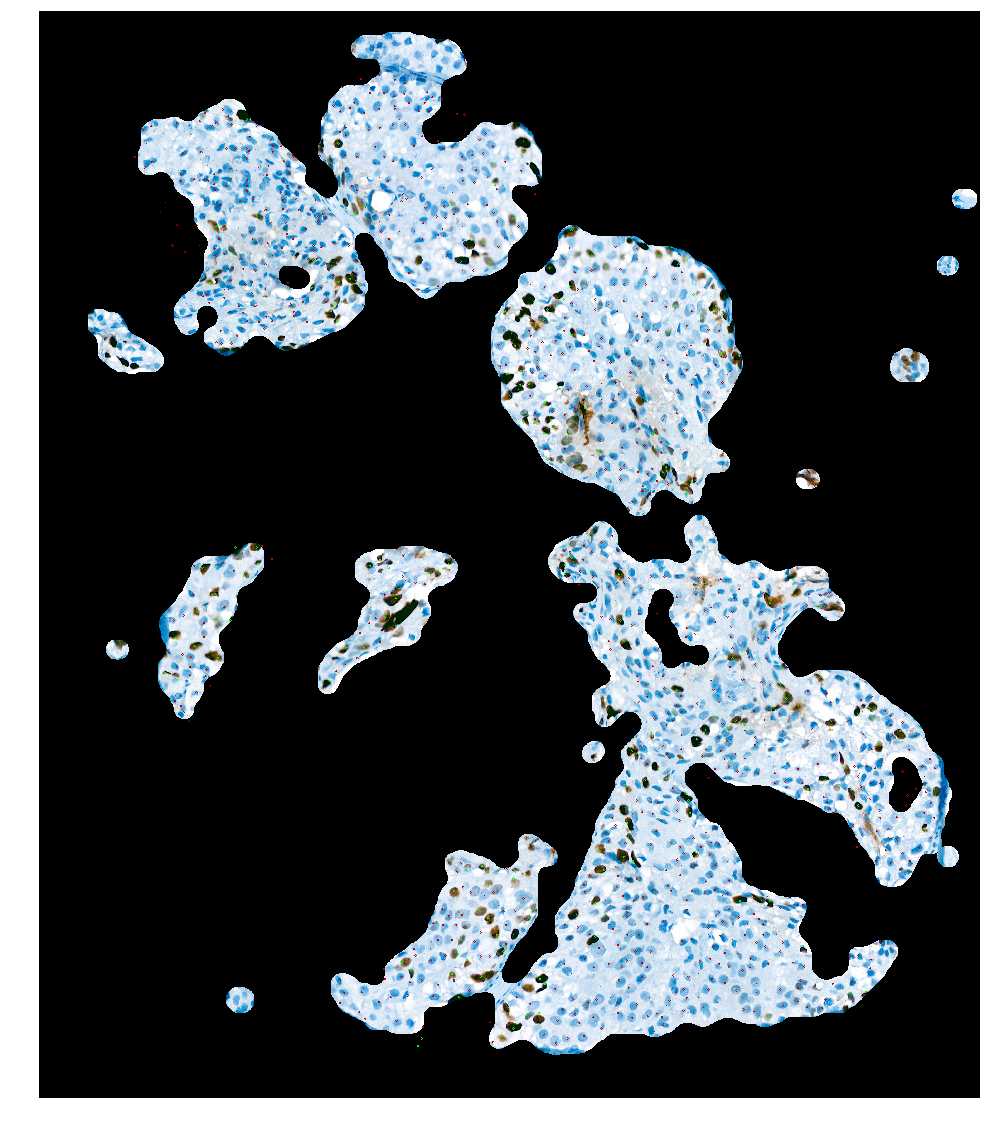

In [157]:
data_path = "../Data/Ki67/Part 1/"

for folder in os.listdir(data_path):
    print("Prepared folder: {}".format(folder))
    for file in os.listdir(data_path + folder + "/"):
        if ".csv" in file:
            labels = pd.read_csv(data_path + folder + "/" + file)
            mask = cv2.imread(data_path + folder + "/" + "mask.png")
            img = cv2.imread(data_path + folder + "/" + file[:-4] + ".png")
            height, width, channels = img.shape
            break
    img = cv2.bitwise_and(img, mask)
    for idx, row in labels.iterrows():
        if row.type == 1:
            cv2.circle(img, (row.x, row.y), 4, (0, 255, 0), thickness=2, lineType=8, shift=0) 
        else:
            cv2.circle(img, (row.x, row.y), 4, (0, 0, 195), thickness=2, lineType=8, shift=0) 
    cv2.imwrite(data_path + folder + "/" + "labels.png", img)  

    blank_image = np.zeros((height, width, channels), np.uint8)
    for idx, row in labels.iterrows():
        if row.type == 1:
            cv2.circle(blank_image, (row.x, row.y), 4, (0, 255, 0), thickness=2, lineType=8, shift=0) 
        else:
            cv2.circle(blank_image, (row.x, row.y), 4, (0, 0, 195), thickness=2, lineType=8, shift=0) 
    cv2.imwrite(data_path + folder + "/" + "blank_labels.png", blank_image)  
    
#     fig = plt.figure(figsize=(20,20))
#     plt.axis('off')
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [25]:
data_path = "../Data/Ki67/Part 2/"

for folder in os.listdir(data_path):
    print("Prepared folder: {}".format(folder))
    labels = pd.read_csv(data_path + folder + "/markers.csv")
    mask = cv2.imread(data_path + folder + "/mask-gt.png")
    img = cv2.imread(data_path + folder + "/base.png")
    height, width, channels = img.shape
    
    img = cv2.bitwise_and(img, mask)
    for idx, row in labels.iterrows():
        if row.type == 1:
            cv2.circle(img, (row.x, row.y), 4, (0, 255, 0), thickness=2, lineType=8, shift=0) 
        else:
            cv2.circle(img, (row.x, row.y), 4, (0, 0, 195), thickness=2, lineType=8, shift=0) 
    cv2.imwrite(data_path + folder + "/" + "labels.png", img)  
    
    blank_image = np.zeros((height, width, channels), np.uint8)
    for idx, row in labels.iterrows():
        if row.type == 1:
            cv2.circle(blank_image, (row.x, row.y), 4, (0, 255, 0), thickness=2, lineType=8, shift=0) 
        else:
            cv2.circle(blank_image, (row.x, row.y), 4, (0, 0, 195), thickness=2, lineType=8, shift=0) 
    cv2.imwrite(data_path + folder + "/" + "blank_labels.png", blank_image)  

for folder in os.listdir(data_path):
    print("Prepared folder: {}".format(folder))
    img = io.imread(data_path + folder + "/base.png")

    hsv_image = rgb2hsv(img)
    io.imsave(data_path + folder + "/" + "hsv.png", hsv_image)  
    
    hed_image = rgb2hed(img)
    hed_image = np.dstack([exposure.rescale_intensity(channel, out_range=(0, 255)) for channel in hed_image.transpose((2, 0, 1))]).astype(np.uint8)
    cv2.imwrite(data_path + folder + "/" + "hed.png", hed_image)  

Prepared folder: 10712-09


Prepared folder: 10842-05


Prepared folder: 1164-03


Prepared folder: 11792-09


Prepared folder: 11955-10


Prepared folder: 15959-05


Prepared folder: 16247-03


Prepared folder: 1628-05


Prepared folder: 16704-03


Prepared folder: 17554-10


Prepared folder: 17762-05


Prepared folder: 17991-04


Prepared folder: 17993-04


Prepared folder: 18583-04


Prepared folder: 19051-09


Prepared folder: 20232-09


Prepared folder: 20847-09


Prepared folder: 22137-04


Prepared folder: 22210-10


Prepared folder: 23805-03


Prepared folder: 24774-10


Prepared folder: 31374-10


Prepared folder: 503-05


Prepared folder: 5563-04


Prepared folder: 6143-05


Prepared folder: 6645-03


Prepared folder: 7468-03


Prepared folder: 7983-03


Prepared folder: 9817-05
